### Kalimati Market Data Analysis

#### Introduction

In this notebook, we fetch the Commodity data that has been scraped, cleaned and formatted and enrich it with weather data of kathmandu. The, we perform Exploratory Data Analysis on the dataframe created and also visualize the dataset from different perspectives.

Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns  
import matplotlib.pyplot as plt
import json
import os

Get Current Working Directory and File

In [2]:
cwd = os.getcwd()

In [3]:
commodity_file = os.path.join(cwd, 'db', 'kalimati_market.json')
weather_file = os.path.join(cwd, 'db', 'weather_data.json')

In [4]:
commodity_json = pd.read_json(commodity_file)
weather_json = pd.read_json(weather_file)
df_commodity = pd.DataFrame(commodity_json)
df_weather = pd.DataFrame(weather_json)

Merge the Commodity and Weather Dataframes

In [5]:
df_commodity = df_commodity.join(df_weather.set_index('Date'), on='Date')

In [6]:
df_commodity.head()

,Name,Unit,Min Price,Max Price,Avg Price,Date,Weather,Max Temp,Rain Probability
0,Tomato Big(Nepali),KG,100,110,105.0,2021-10-28,Partly Cloudy,26.0,0.0
1,Tomato Big(Indian),KG,100,110,105.0,2021-10-28,Partly Cloudy,26.0,0.0
2,Tomato Small(Local),KG,70,80,75.0,2021-10-28,Partly Cloudy,26.0,0.0
3,Tomato Small(Tunnel),KG,80,90,85.0,2021-10-28,Partly Cloudy,26.0,0.0
4,Potato Red,KG,60,65,62.5,2021-10-28,Partly Cloudy,26.0,0.0


Check if the dataset has any missing values

In [7]:
df_commodity.isnull().sum()

Name                  0
Unit                  0
Min Price             0
Max Price             0
Avg Price             0
Date                  0
Weather             302
Max Temp            302
Rain Probability    302
dtype: int64

Interpolate missing 'Max Temp' and 'Rain Probability' values

In [8]:
df_commodity.interpolate(method ='linear', limit_direction ='forward', inplace=True)

Fill missing 'Weather' column values with 'Unknown' string

In [9]:
df_commodity['Weather'] = df_commodity['Weather'].fillna('Unknown')

Checking the max and min priced item

In [10]:
cheapest_item = df_commodity.iloc[df_commodity['Avg Price'].idxmin()]
cheapest_item

Name                                         Cabbage(Local)
Unit                                                     KG
Min Price                                                 6
Max Price                                                 8
Avg Price                                               7.0
Date                                    2020-05-19 00:00:00
Weather             Partly cloudy with brief thundershowers
Max Temp                                               31.0
Rain Probability                                       40.0
Name: 44914, dtype: object

In [11]:
cheapest_item_name = cheapest_item['Name']

In [12]:
costliest_item = df_commodity.iloc[df_commodity['Avg Price'].idxmax()]
costliest_item

Name                          Asparagus
Unit                                 KG
Min Price                          1800
Max Price                          2000
Avg Price                        1900.0
Date                2020-10-22 00:00:00
Weather                   Partly Cloudy
Max Temp                           30.0
Rain Probability                    0.0
Name: 34430, dtype: object

In [13]:
costliest_item_name = costliest_item['Name']

### Basic Info of the entry

In [14]:
df_commodity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59711 entries, 0 to 59710
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              59711 non-null  object        
 1   Unit              59711 non-null  object        
 2   Min Price         59711 non-null  int64         
 3   Max Price         59711 non-null  int64         
 4   Avg Price         59711 non-null  float64       
 5   Date              59711 non-null  datetime64[ns]
 6   Weather           59711 non-null  object        
 7   Max Temp          59711 non-null  float64       
 8   Rain Probability  59711 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 4.1+ MB


In [15]:
df_commodity.describe(include="all", datetime_is_numeric=True)

,Name,Unit,Min Price,Max Price,Avg Price,Date,Weather,Max Temp,Rain Probability
count,59711,59711,59711.000000,59711.000000,59711.000000,59711,59711,59711.000000,59711.000000
unique,131,3,NaN,NaN,NaN,NaN,13,NaN,NaN
top,Ginger,KG,NaN,NaN,NaN,NaN,Partly Cloudy,NaN,NaN
freq,720,58312,NaN,NaN,NaN,NaN,16316,NaN,NaN
mean,NaN,NaN,104.852858,115.964646,110.408752,2020-11-17 23:21:20.507779072,NaN,25.917687,27.451558
min,NaN,NaN,5.000000,8.000000,7.000000,2019-10-30 00:00:00,NaN,12.000000,0.000000
25%,NaN,NaN,40.000000,50.000000,45.000000,2020-05-22 00:00:00,NaN,22.000000,0.000000
50%,NaN,NaN,70.000000,80.000000,75.000000,2020-12-13 00:00:00,NaN,27.000000,30.000000
75%,NaN,NaN,130.000000,150.000000,135.000000,2021-05-13 00:00:00,NaN,30.000000,60.000000
max,NaN,NaN,1800.000000,2000.000000,1900.000000,2021-10-28 00:00:00,NaN,34.000000,80.000000


Lets generate a density plot to see where the average price of commodities are densed.

<AxesSubplot:xlabel='Avg Price', ylabel='Density'>

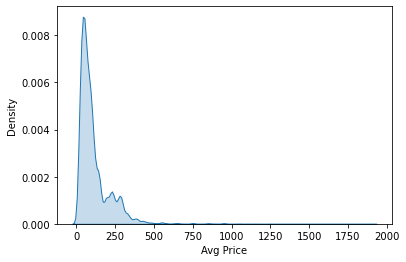

In [16]:
sns.kdeplot(data=df_commodity['Avg Price'], shade=True)

This shows that most of the commodities are averaged at around Rs. 50-120 price mark. 

Fetching only the Potato Red item records

In [17]:
df_potato_red = df_commodity[df_commodity['Name']=='Potato Red']

In [18]:
df_potato_red.loc[:,'Price Change'] = df_potato_red.loc[:,'Avg Price'] - df_potato_red.loc[:,'Avg Price'].shift(-1)

C:\Users\Omen\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Omen\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [19]:
df_potato_red

,Name,Unit,Min Price,Max Price,Avg Price,Date,Weather,Max Temp,Rain Probability,Price Change
4,Potato Red,KG,60,65,62.5,2021-10-28,Partly Cloudy,26.0,0.0,-4.0
100,Potato Red,KG,65,68,66.5,2021-10-27,Partly Cloudy,27.0,0.0,-1.0
196,Potato Red,KG,65,70,67.5,2021-10-26,Partly Cloudy,26.0,0.0,0.0
291,Potato Red,KG,65,70,67.5,2021-10-25,Generally cloudy with brief thundershowers,26.0,30.0,0.0
388,Potato Red,KG,65,70,67.5,2021-10-24,Generally cloudy with brief thundershowers,29.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59382,Potato Red,KG,70,75,72.5,2019-11-03,Partly Cloudy,26.0,0.0,9.0
59454,Potato Red,KG,62,65,63.5,2019-11-02,Partly Cloudy,26.0,0.0,0.0
59525,Potato Red,KG,62,65,63.5,2019-11-01,Partly Cloudy,26.0,0.0,-1.5
59593,Potato Red,KG,64,66,65.0,2019-10-31,Partly Cloudy,25.0,0.0,1.0


In [20]:
df_potato_red[['Price Change']] = df_potato_red[['Price Change']].fillna(0)

C:\Users\Omen\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_potato_red.dtypes

Name                        object
Unit                        object
Min Price                    int64
Max Price                    int64
Avg Price                  float64
Date                datetime64[ns]
Weather                     object
Max Temp                   float64
Rain Probability           float64
Price Change               float64
dtype: object

Plot to see change in average price of items with date

DistPlot

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Price', ylabel='Density'>

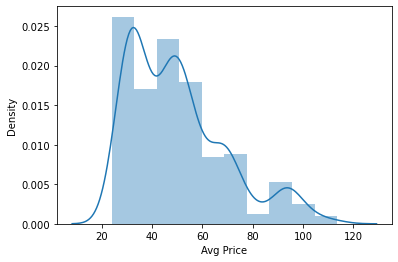

In [22]:
sns.distplot(df_potato_red['Avg Price'], bins=10, kde=True)

This shows that Potato Red is mostly priced around Rs 20-50

[Text(0.5, 1.0, 'Potato Red')]

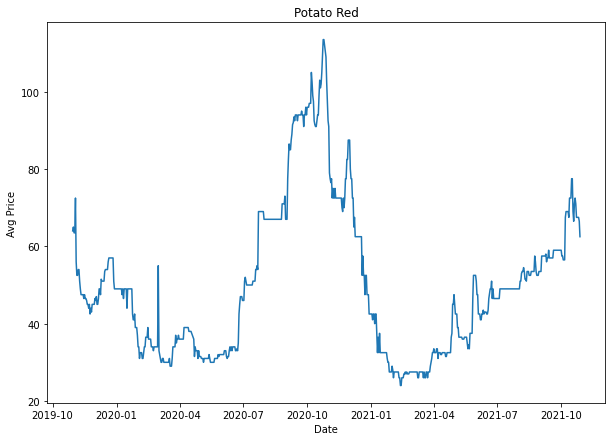

In [23]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_potato_red, x="Date", y="Avg Price").set(title='Potato Red')

This shows that price of potato red is usually expensive during the October month.

[Text(0.5, 1.0, 'Potato Red')]

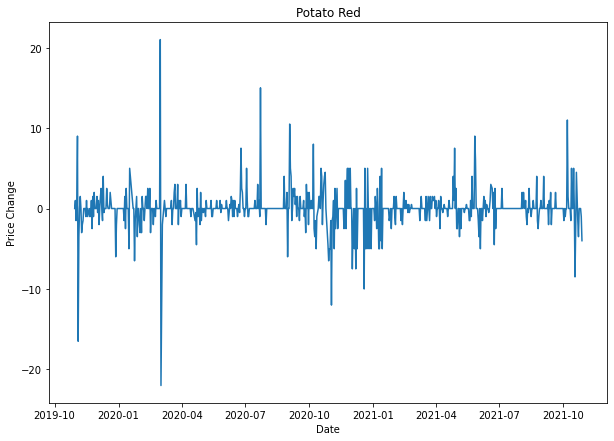

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_potato_red, x="Date", y="Price Change").set(title='Potato Red')

The price of potato red doesn't change rapidly increase or decrease

In [25]:
df_potato_red = df_potato_red.set_index('Date')

In [26]:
pv = pd.pivot_table(df_potato_red, index=df_potato_red.index.month, columns=df_potato_red.index.year,
                    values='Avg Price', aggfunc='mean')

<AxesSubplot:xlabel='Date'>

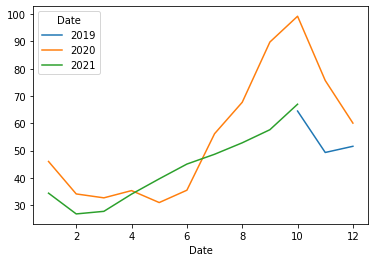

In [27]:
pv.plot()

This shows that the price of Potato is rapidly increasing like past years data during the same time.

Lets take a look at the average price costliest commodity on the market with time

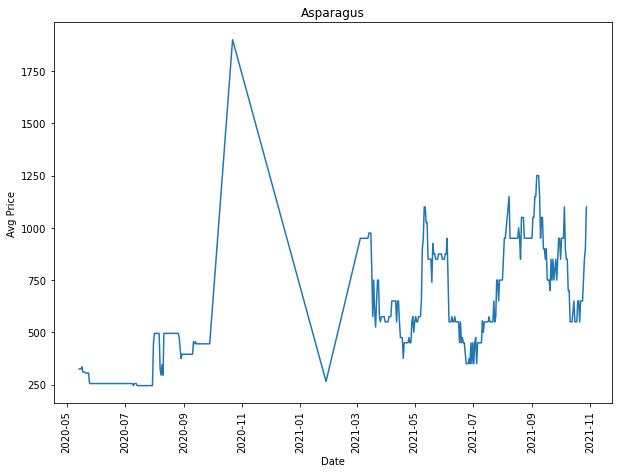

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_commodity[df_commodity['Name']==costliest_item_name], x="Date", y="Avg Price").set(title=costliest_item_name)
plt.xticks(rotation=90)
plt.show()

So the price of Asparagus is cheapest mostly during the 5th(May) and 7th(July) month of the year

In [29]:
df_commodity = df_commodity.set_index('Date')

In [30]:
pv = pd.pivot_table(df_commodity[df_commodity['Name']==costliest_item_name], index=df_commodity[df_commodity['Name']==costliest_item_name].index.month, columns=df_commodity[df_commodity['Name']==costliest_item_name].index.year,
                    values='Avg Price', aggfunc='mean')

<AxesSubplot:title={'center':'Asparagus'}, xlabel='Date'>

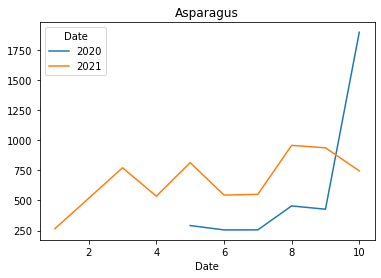

In [31]:
pv.plot(title=costliest_item_name)

From the graph, it seems like the price of Asparagus is steadier in 2021 than in 2020.

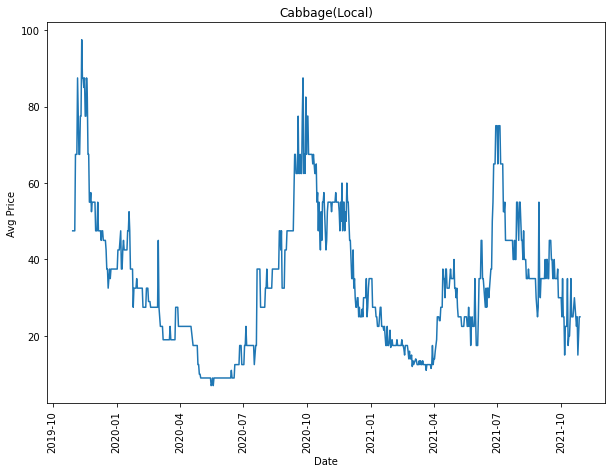

In [32]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_commodity[df_commodity['Name']==cheapest_item_name], x="Date", y="Avg Price").set(title=cheapest_item_name)
plt.xticks(rotation=90)
plt.show()

This shows that local cabbage is mostly expensive on the second half of the year.

In [33]:
pv = pd.pivot_table(df_commodity[df_commodity['Name']==cheapest_item_name], index=df_commodity[df_commodity['Name']==cheapest_item_name].index.month, columns=df_commodity[df_commodity['Name']==cheapest_item_name].index.year,
                    values='Avg Price', aggfunc='mean')

<AxesSubplot:title={'center':'Cabbage(Local)'}, xlabel='Date'>

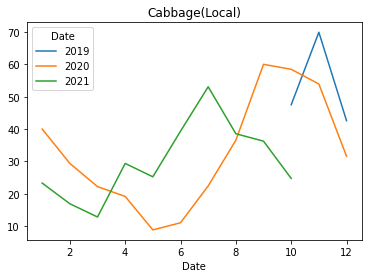

In [34]:
pv.plot(title=cheapest_item_name)

Here, the price is mostly low and according to its trend, it looks as if its about to reach at an even lower price point before it starts to increase.

Checking top 5 expensive items and top 5 cheapest items

In [35]:
df_sorted = df_commodity.sort_values(by='Avg Price', ascending=False)
top5 = df_sorted.drop_duplicates(subset="Name", keep='first').head()

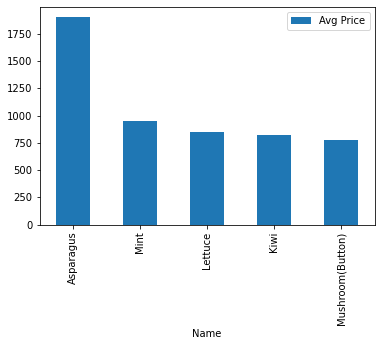

In [36]:
ax = top5.plot.bar(x='Name', y='Avg Price')

In [37]:
bottom5 = df_sorted.drop_duplicates(subset="Name", keep='last').tail()

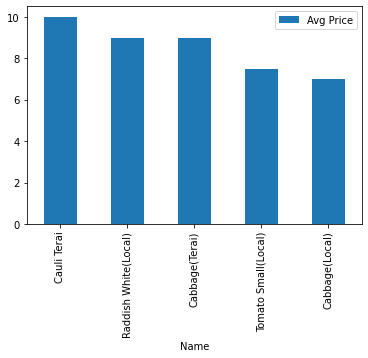

In [38]:
ax = bottom5.plot.bar(x='Name', y='Avg Price')

In [39]:
df_commodity = df_commodity.reset_index()
df_commodity

,Date,Name,Unit,Min Price,Max Price,Avg Price,Weather,Max Temp,Rain Probability
0,2021-10-28,Tomato Big(Nepali),KG,100,110,105.0,Partly Cloudy,26.0,0.0
1,2021-10-28,Tomato Big(Indian),KG,100,110,105.0,Partly Cloudy,26.0,0.0
2,2021-10-28,Tomato Small(Local),KG,70,80,75.0,Partly Cloudy,26.0,0.0
3,2021-10-28,Tomato Small(Tunnel),KG,80,90,85.0,Partly Cloudy,26.0,0.0
4,2021-10-28,Potato Red,KG,60,65,62.5,Partly Cloudy,26.0,0.0
...,...,...,...,...,...,...,...,...,...
59706,2019-10-30,Garlic Dry Nepali,KG,190,200,195.0,Generally Cloudy,26.0,30.0
59707,2019-10-30,Fish Fresh(Rahu),KG,280,285,282.5,Generally Cloudy,26.0,30.0
59708,2019-10-30,Fish Fresh(Bachuwa),KG,220,225,222.5,Generally Cloudy,26.0,30.0
59709,2019-10-30,Fish Fresh(Chhadi),KG,200,210,205.0,Generally Cloudy,26.0,30.0


#### Lets plot a general heatmap of numerical values to see if we get any info

<AxesSubplot:>

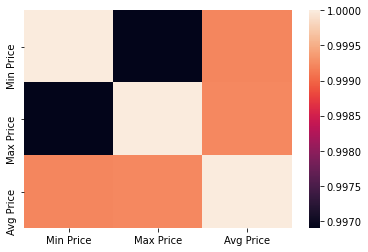

In [40]:
corr = df_potato_red[['Min Price', 'Max Price', 'Avg Price']].corr()
sns.heatmap(corr)

Performing Time Series Analysis on Red Potato dataframe

In [41]:
df_potato_red = df_potato_red.loc[:, df_potato_red.columns.intersection(['Date','Avg Price'])]

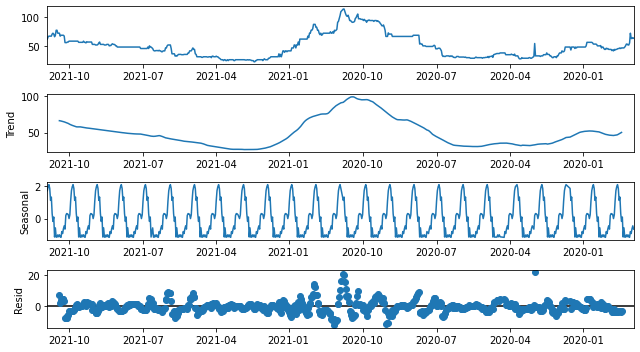

In [42]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [9,5]
decomposition = sm.tsa.seasonal_decompose(df_potato_red, model =  'additive', period = 30)
fig = decomposition.plot()

Level: Shows the average value in the series over time 
Trend: Shows that the trend is increasing during the start of the year and decreasing towards the end
Seasonal: Shows that pattern is repetitive in short term 
Noise: Shows that there are a few residual prices that donot fit the general scenario

We create a pivot table to plot all the commodity values in one plot

In [43]:
df_all_avg = df_commodity.pivot_table(index='Date',columns='Name',values='Avg Price',aggfunc='sum')
df_all_avg.isna().sum().sort_values(ascending=False)

Name
Musk Melon             719
Mandarin               719
Fish Fresh             716
Sweet Lime             715
Water Melon(Dotted)    709
                      ... 
Cauli Local              2
Chilli Dry               2
Cabbage(Local)           1
Coriander Green          0
Ginger                   0
Length: 131, dtype: int64

Since there are lots of missing values, we try to impute them using .interpolate()

In [44]:
df_check = df_all_avg.interpolate()
df_check.isna().sum().sort_values(ascending=False)

Name
Mango(Dushari)          549
Mango(Chousa)           546
Mango(Calcutte)         527
Water Melon(Dotted)     527
Bauhania flower         479
                       ... 
Pineapple                 0
Pointed Gourd(Local)      0
Ginger                    0
Chilli Green(Akbare)      0
Lime                      0
Length: 131, dtype: int64

Now, we select only the columns with no missing values

In [45]:
df_check.dropna(axis='columns', inplace=True)

<AxesSubplot:xlabel='Date'>

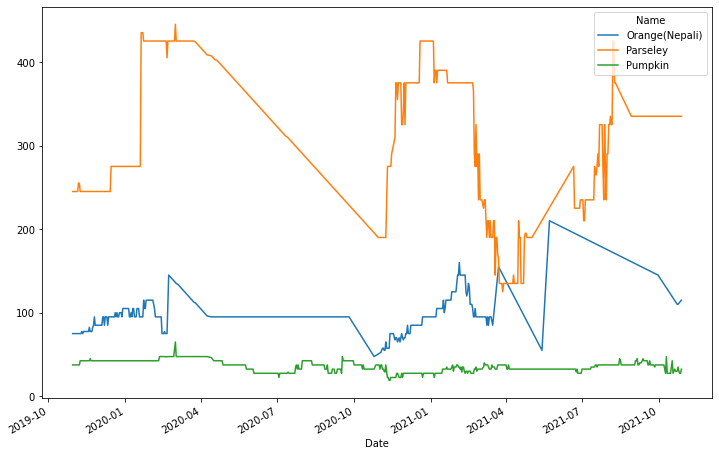

In [46]:
plt.rcParams['figure.figsize'] = [12,8]
df_check.sample(n=3, axis='columns').plot()

From the plot, we can see the change in price of items with time. As we can see some are pretty rapid and vast changes than others.

Lets take a look at Orange (Nepali) and Orange (Indian)

In [47]:
df_avg_price = df_commodity.pivot_table(index='Date',columns='Name',values='Avg Price',aggfunc='sum')

In [48]:
df_avg_price.head()

Name,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Bakula,Bamboo Shoot,Banana,Barela,Bauhania flower,Bitter Gourd,...,Tomato Big(Nepali),Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,NaN,145.0,NaN,NaN,NaN,115.0,95.0,NaN,NaN,NaN,...,NaN,NaN,117.5,NaN,117.5,NaN,95.0,NaN,57.5,NaN
2019-10-31,NaN,145.0,NaN,NaN,NaN,115.0,95.0,NaN,NaN,97.5,...,135.0,NaN,85.0,NaN,90.0,NaN,95.0,NaN,57.5,NaN
2019-11-01,NaN,145.0,NaN,NaN,NaN,115.0,95.0,NaN,NaN,97.5,...,155.0,NaN,85.0,NaN,85.0,NaN,65.0,NaN,57.5,NaN
2019-11-02,NaN,145.0,NaN,NaN,NaN,115.0,85.0,NaN,NaN,97.5,...,97.5,NaN,65.0,NaN,75.0,NaN,65.0,NaN,57.5,NaN
2019-11-03,NaN,145.0,NaN,NaN,NaN,115.0,85.0,45.0,NaN,97.5,...,97.5,NaN,62.5,NaN,85.0,NaN,65.0,NaN,57.5,NaN


In [49]:
df_check = df_avg_price.interpolate()
df_check.isna().sum().sort_values(ascending=False)

Name
Mango(Dushari)          549
Mango(Chousa)           546
Mango(Calcutte)         527
Water Melon(Dotted)     527
Bauhania flower         479
                       ... 
Pineapple                 0
Pointed Gourd(Local)      0
Ginger                    0
Chilli Green(Akbare)      0
Lime                      0
Length: 131, dtype: int64

In [50]:
df_check.dropna(axis='columns', inplace=True)

In [51]:
df_oranges = df_check[['Orange(Nepali)','Orange(Indian)']]
df_oranges.reset_index(inplace=True)

In [52]:
df_oranges

Name,Date,Orange(Nepali),Orange(Indian)
0,2019-10-30,75.00,95.000000
1,2019-10-31,75.00,95.000000
2,2019-11-01,75.00,95.000000
3,2019-11-02,75.00,95.000000
4,2019-11-03,75.00,85.000000
...,...,...,...
715,2021-10-24,110.00,111.666667
716,2021-10-25,111.25,110.000000
717,2021-10-26,112.50,110.000000
718,2021-10-27,113.75,110.000000


The data looks interesting. On 2019, Nepalese Oranges were cheaper, but now they are expensive.

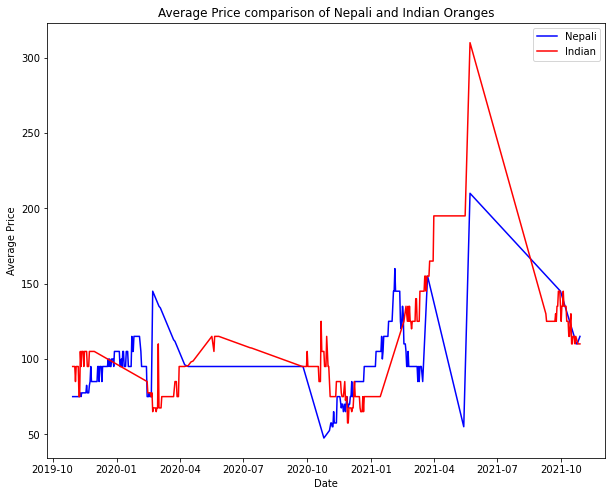

In [53]:
plt.figure(figsize=(10, 8))
plt.plot(df_oranges['Date'], df_oranges['Orange(Nepali)'], 'b-', label = 'Nepali')
plt.plot(df_oranges['Date'], df_oranges['Orange(Indian)'], 'r-', label = 'Indian')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price comparison of Nepali and Indian Oranges')
plt.legend()

So the price of Nepali and Indian oranges have been competitive till April of 2021. Then, Nepali Oranges started to increase rapidly. But as of now, their prices are similar.

In [54]:
df_onion_dry = df_commodity[df_commodity['Name']=='Onion Dry (Indian)']

In [55]:
df_onion_dry.head()

,Date,Name,Unit,Min Price,Max Price,Avg Price,Weather,Max Temp,Rain Probability
8,2021-10-28,Onion Dry (Indian),KG,65,70,67.5,Partly Cloudy,26.0,0.0
104,2021-10-27,Onion Dry (Indian),KG,65,70,67.5,Partly Cloudy,27.0,0.0
200,2021-10-26,Onion Dry (Indian),KG,65,70,67.5,Partly Cloudy,26.0,0.0
295,2021-10-25,Onion Dry (Indian),KG,65,70,67.5,Generally cloudy with brief thundershowers,26.0,30.0
392,2021-10-24,Onion Dry (Indian),KG,65,70,67.5,Generally cloudy with brief thundershowers,29.0,40.0


Lets create a boxplot to see if the Avg Price wrt time has any outliers

<ipython-input-56-429a2f997c08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onion_dry_ranged['Year'] = pd.DatetimeIndex(df_onion_dry_ranged['Date']).year
C:\Users\Omen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Avg Price'>

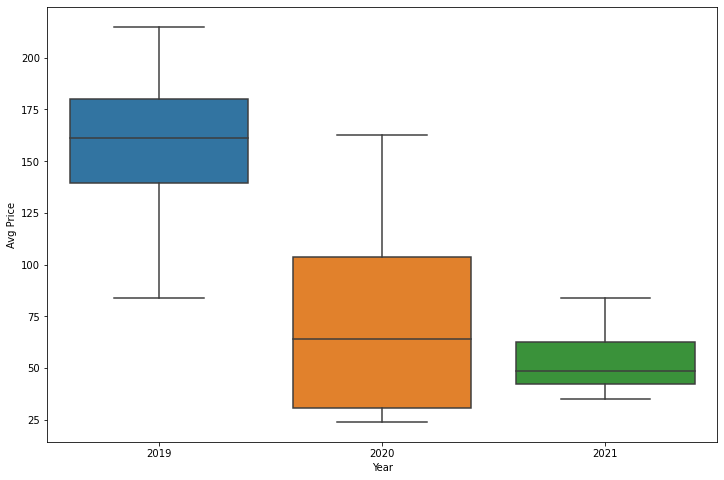

In [56]:
df_onion_dry_ranged = df_onion_dry
df_onion_dry_ranged['Year'] = pd.DatetimeIndex(df_onion_dry_ranged['Date']).year
sns.boxplot('Year', 'Avg Price', data=df_onion_dry)

This shows that the price of onions has decreased over the years.

In [57]:
df_onion_dry_curated = df_onion_dry.drop(['Name','Unit', 'Min Price', 'Max Price', 'Weather', 'Date'], axis='columns')

In [58]:
df_onion_dry_curated

,Avg Price,Max Temp,Rain Probability,Year
8,67.5,26.0,0.0,2021
104,67.5,27.0,0.0,2021
200,67.5,26.0,0.0,2021
295,67.5,26.0,30.0,2021
392,67.5,29.0,40.0,2021
...,...,...,...,...
59384,94.0,26.0,0.0,2019
59456,94.0,26.0,0.0,2019
59527,92.5,26.0,0.0,2019
59595,84.0,25.0,0.0,2019


<AxesSubplot:xlabel='Max Temp'>

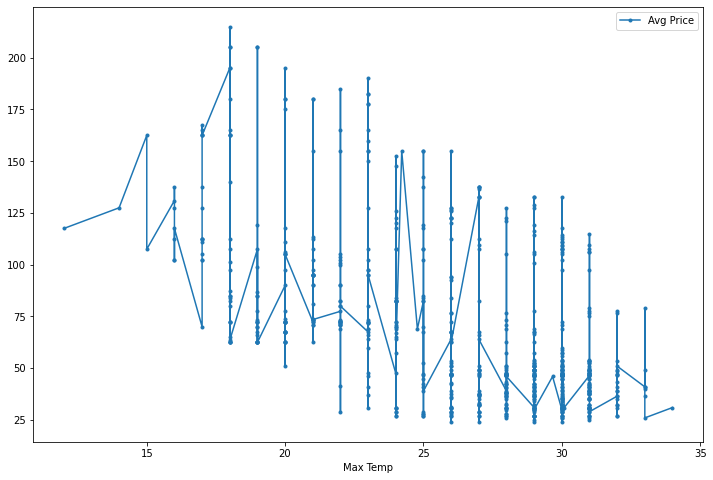

In [59]:
df_onion_dry_curated = df_onion_dry_curated.sort_values(by=['Max Temp'])
df_onion_dry_curated.plot(x = 'Max Temp', y = 'Avg Price', marker = '.')

It is fairly unclear, but we can see that the price of onions are more expensive during the winter and are cheaper during the summer.

<AxesSubplot:xlabel='Rain Probability'>

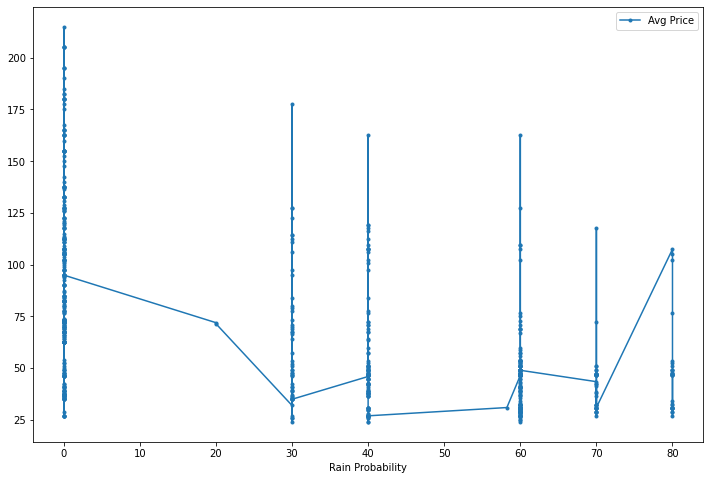

In [60]:
df_onion_dry_curated = df_onion_dry_curated.sort_values(by=['Rain Probability'])
df_onion_dry_curated.plot(x = 'Rain Probability', y = 'Avg Price', marker = '.')

This data provides information that the price of the onion doesnt really depend on Rain Probability or temperature of Kathmandu.

Lets look at Tomato Local (Small)

In [61]:
df_tomato_local = df_commodity[df_commodity['Name']=='Tomato Small(Local)']

In [62]:
df_tomato_local_curated = df_tomato_local.drop(['Name','Unit', 'Min Price', 'Max Price', 'Weather'], axis='columns')

In [63]:
df_tomato_local_curated['day'] = df_tomato_local_curated['Date'].dt.day
df_tomato_local_curated['month'] = df_tomato_local_curated['Date'].dt.month
df_tomato_local_curated['year'] = df_tomato_local_curated['Date'].dt.year
df_tomato_local_curated

,Date,Avg Price,Max Temp,Rain Probability,day,month,year
2,2021-10-28,75.0,26.0,0.0,28,10,2021
98,2021-10-27,65.0,27.0,0.0,27,10,2021
194,2021-10-26,75.0,26.0,0.0,26,10,2021
289,2021-10-25,65.0,26.0,30.0,25,10,2021
386,2021-10-24,45.0,29.0,40.0,24,10,2021
...,...,...,...,...,...,...,...
59380,2019-11-03,62.5,26.0,0.0,3,11,2019
59452,2019-11-02,65.0,26.0,0.0,2,11,2019
59523,2019-11-01,85.0,26.0,0.0,1,11,2019
59591,2019-10-31,85.0,25.0,0.0,31,10,2019


In [64]:
df_tomato_local_curated_2021 = df_tomato_local_curated.loc[df_tomato_local_curated['year'] == 2021]

In [65]:
df_tomato_local_curated_2021

,Date,Avg Price,Max Temp,Rain Probability,day,month,year
2,2021-10-28,75.0,26.0,0.0,28,10,2021
98,2021-10-27,65.0,27.0,0.0,27,10,2021
194,2021-10-26,75.0,26.0,0.0,26,10,2021
289,2021-10-25,65.0,26.0,30.0,25,10,2021
386,2021-10-24,45.0,29.0,40.0,24,10,2021
...,...,...,...,...,...,...,...
27476,2021-01-05,32.5,19.0,0.0,5,1,2021
27572,2021-01-04,35.0,18.0,0.0,4,1,2021
27670,2021-01-03,37.5,19.0,0.0,3,1,2021
27769,2021-01-02,35.0,19.0,0.0,2,1,2021


In [66]:
def yearly_plot():
    each_month = df_tomato_local_curated_2021.groupby(['year', 'month'])['Avg Price', 'Rain Probability'].mean().reset_index()
    plt.figure(figsize=(10,6))
    sns.lineplot(x='month', y='Avg Price', label='Avg Price', data=each_month).set_title("Average Price and Rain Probability in 2021", fontsize=15)
    sns.lineplot(x='month', y='Rain Probability', palette='tab10', label='Rain Probability', data=each_month)

<ipython-input-66-f808bbd19218>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  each_month = df_tomato_local_curated_2021.groupby(['year', 'month'])['Avg Price', 'Rain Probability'].mean().reset_index()


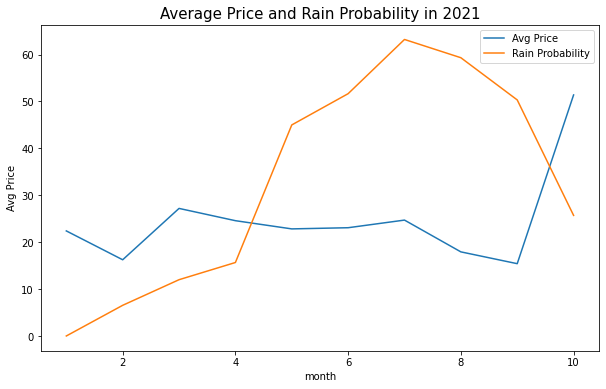

In [67]:
yearly_plot()

We can see that the aftermath of heavy rainfall during the rainy season lead to price hike trend.

In [71]:
df_chyau_btn = df_commodity[df_commodity['Name']=='Mushroom(Button)']
df_chyau_kanya = df_commodity[df_commodity['Name']=='Mushroom(Kanya)']

In [80]:
df_chyau_btn.set_index('Date', inplace=True)

In [81]:
df_chyau_kanya.set_index('Date', inplace=True)

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Price', ylabel='Density'>

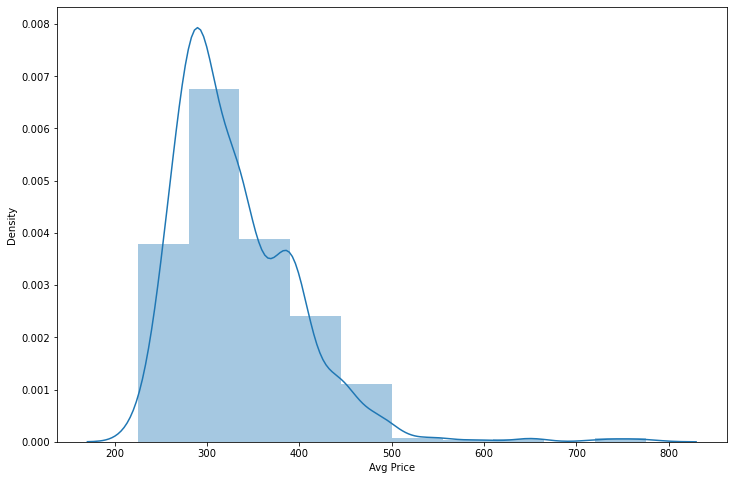

In [73]:
sns.distplot(df_chyau_btn['Avg Price'], bins=10, kde=True)

This distplot shows that the price of the button chyau has been mostly averaged around 250-350 price mark. 

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Price', ylabel='Density'>

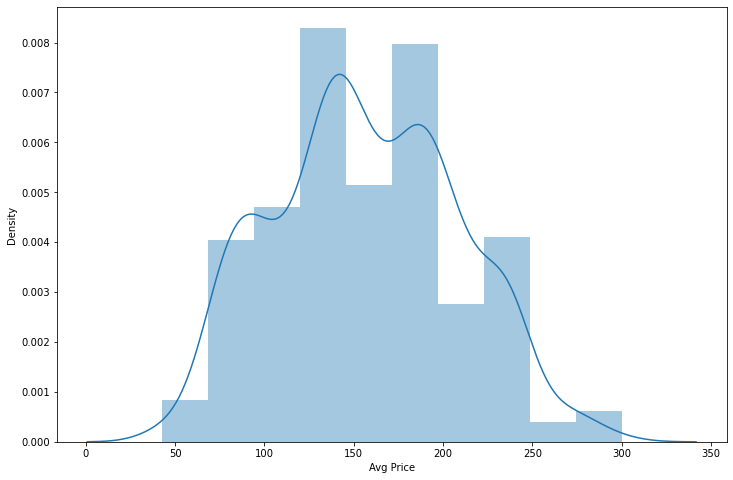

In [74]:
sns.distplot(df_chyau_kanya['Avg Price'], bins=10, kde=True)

This distplot shows that the Price of Kanya Chyau has been averaging around 120-200 price mark.

In [82]:
pv = pd.pivot_table(df_chyau_btn, index=df_chyau_btn.index.month, columns=df_chyau_btn.index.year,
                    values='Avg Price', aggfunc='mean')

<AxesSubplot:title={'center':'Chyau(Button)'}, xlabel='Date'>

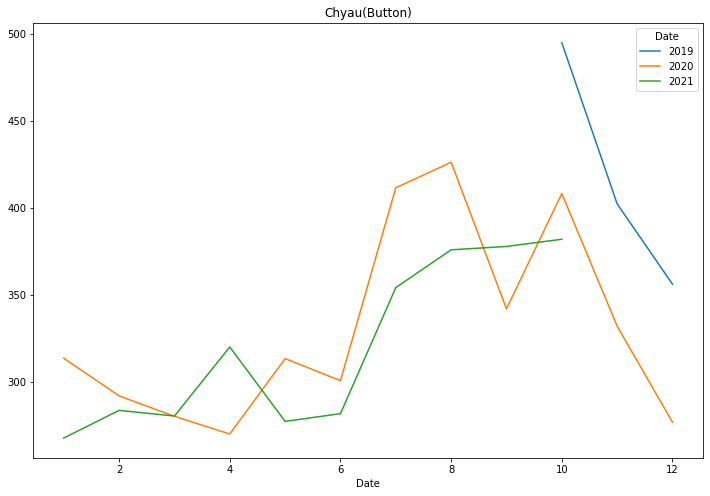

In [85]:
pv.plot(title='Chyau(Button)')

This shows that the price of the Button Chyau is mostly cheaper during the first half of the year.

In [87]:
pv = pd.pivot_table(df_chyau_kanya, index=df_chyau_kanya.index.month, columns=df_chyau_kanya.index.year,
                    values='Avg Price', aggfunc='mean')

<AxesSubplot:title={'center':'Chyau(Kanya)'}, xlabel='Date'>

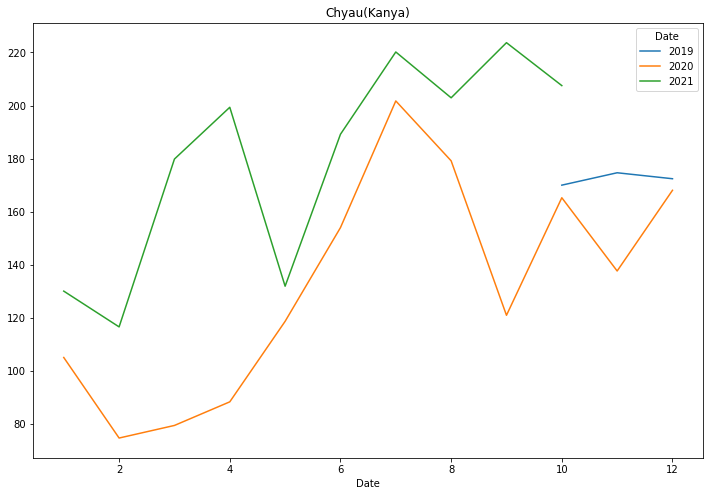

In [88]:
pv.plot(title='Chyau(Kanya)')

This shows that the price of Kanya Chyau is more expensive in current year than in the past year. Also, it is mostly expensive during the second half of the year.

#### Conclusion

Performing EDA and visualizing the dataset from various angles provided insights on the trends and factors that affect the market price of the commodities. Since we had weather data of Kathmandu, we saw that weather of kathmandu has very little effect on the prices of the commodities.